# Support Center Queue ... Stochastic Sim. Phase 2

Jill is happy that her code seems to be running well, and simulating a fixed arrival and service stream.  But she is ready to ramp-up her analysis.  First, she wants to simulate many days, and experiment with adding staff, etc.  The first step she thinks is to generate arrivals to the support center randomly, and generate random service times --- A monte carlo simulation.  She knows from her intro to Ops class (which she loved), that one way to help validate her code is to compare it to a theoretical M/M/1 queueing system.  Once she sees her code match the theoretical values, she would feel better about making changes to the distribution, etc.  That is, she will have confidence that her code is working.   So here is her current plan for Phase 2:

- Jobs arrive to the support center with interarrival times according to an exponential distribution
- Service times are generated according to an exponential distribution
- Still just one server (for now!), and thus she will be simulating an M/M/1 queueing system

## Let's load up some common code modules before we begin

In [84]:
import math
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

## Let's load our data into Python data structures

In [85]:
# Create NUMBER_OF_ARRIVALS arrivals with interarrival times 
#  Exponentially distributed with mean MEAN_TIME_BETWEEN_ARRIVALS
#  And service times exponentially distributed with MEAN_SERVICE_TIME
NUMBER_OF_ARRIVALS = 100000
MEAN_TIME_BETWEEN_ARRIVALS = 200
MEAN_SERVICE_TIME = 190

arrival_jobs = []
#np.random.seed(55)

for i in range(NUMBER_OF_ARRIVALS):
    # create a new job object
    new_job = {'arrival_time': None, 'service_completion_time': None}
    
    # Put the first arrival at time 0
    if (i==0):
        new_job['arrival_time'] = 0
    else:
        # note arrival_jobs[-1] returns the last job in the arrival_jobs list 
        last_arrival_time = arrival_jobs[-1]['arrival_time']
        next_arrival_time = last_arrival_time + math.ceil(np.random.exponential(MEAN_TIME_BETWEEN_ARRIVALS))
        new_job['arrival_time'] = next_arrival_time
        
    arrival_jobs.append(new_job)

# Let's inspect the first few arrival times
pprint(arrival_jobs[:20],indent=4)


[   {'arrival_time': 0, 'service_completion_time': None},
    {'arrival_time': 42, 'service_completion_time': None},
    {'arrival_time': 57, 'service_completion_time': None},
    {'arrival_time': 159, 'service_completion_time': None},
    {'arrival_time': 258, 'service_completion_time': None},
    {'arrival_time': 269, 'service_completion_time': None},
    {'arrival_time': 371, 'service_completion_time': None},
    {'arrival_time': 406, 'service_completion_time': None},
    {'arrival_time': 849, 'service_completion_time': None},
    {'arrival_time': 933, 'service_completion_time': None},
    {'arrival_time': 1608, 'service_completion_time': None},
    {'arrival_time': 1665, 'service_completion_time': None},
    {'arrival_time': 1735, 'service_completion_time': None},
    {'arrival_time': 1956, 'service_completion_time': None},
    {'arrival_time': 2304, 'service_completion_time': None},
    {'arrival_time': 2321, 'service_completion_time': None},
    {'arrival_time': 2357, 'service_co

## Let's create a few more data structures that will be useful for our simulation

In [86]:
# job_queue is a list to hold jobs that have arrived and are waiting for service
jobs_in_queue = []
# A variable that holds None or job in service
job_in_service = None
# job_completion_times is a list holding when jobs complete service
completed_jobs = []
# Store the total system time for each job into a list
system_time=[]

## We will now loop through time, with a variable called  `time_period`

In [87]:
#  We will increment time_period as simulation proceeds
time_period = 0
TOTAL_NUMBER_OF_JOBS = len(arrival_jobs)
#  We will run our simulation until all jobs have departed service
while len(completed_jobs) < TOTAL_NUMBER_OF_JOBS:
    #print('Time Period:',time_period)
    #
    # PROCESS POSSIBLE ARRIVAL TO QUEUE
    # Note: First make sure arriva_jobs list is not empty
    #       Then, see if next arrival is now, that is, the current time_period
    if (len(arrival_jobs) > 0 and arrival_jobs[0]['arrival_time'] == time_period):
        #print('** Process Arrival at time',time_period)
        
        # remove first job from arrival_jobs
        job_moving_to_queue = arrival_jobs.pop(0)
        # append job to end of jobs_in_queue
        jobs_in_queue.append(job_moving_to_queue)
    #
    # PROCESS POSSIBLE SERVICE COMPLETION
    if (job_in_service != None and job_in_service["service_completion_time"]==time_period):
        #print('** Process Departure at time',time_period)
        # add job to departure_times list
        completed_jobs.append(job_in_service)
        # save the total system time of the job
        system_time.append(job_in_service['service_completion_time']-job_in_service['arrival_time'])
        # Free up our server
        job_in_service = None
    #
    # PROCESS POSSIBLE START OF SERVICE, DEPARTURE FROM QUEUE
    if (job_in_service==None and len(jobs_in_queue) > 0):
        #print('** Process Start of Service at time:',time_period)
        # remove first job from queue
        job_in_service = jobs_in_queue.pop(0)
        # Place in service by setting service_completion_time
        job_in_service["service_time"] = math.ceil(np.random.exponential(MEAN_SERVICE_TIME))
        # Store when job will complete service in the job object
        job_in_service["service_completion_time"] = time_period +  job_in_service["service_time"]
    #
    # Increment the time_period before going back to top of loop
    time_period += 1

In [88]:
pprint(completed_jobs[:20],indent=4)

[   {'arrival_time': 0, 'service_completion_time': 207, 'service_time': 207},
    {'arrival_time': 42, 'service_completion_time': 457, 'service_time': 250},
    {'arrival_time': 57, 'service_completion_time': 500, 'service_time': 43},
    {'arrival_time': 159, 'service_completion_time': 544, 'service_time': 44},
    {'arrival_time': 258, 'service_completion_time': 825, 'service_time': 281},
    {'arrival_time': 269, 'service_completion_time': 1001, 'service_time': 176},
    {'arrival_time': 371, 'service_completion_time': 1165, 'service_time': 164},
    {'arrival_time': 406, 'service_completion_time': 1318, 'service_time': 153},
    {'arrival_time': 849, 'service_completion_time': 1523, 'service_time': 205},
    {'arrival_time': 933, 'service_completion_time': 1536, 'service_time': 13},
    {   'arrival_time': 1608,
        'service_completion_time': 1838,
        'service_time': 230},
    {   'arrival_time': 1665,
        'service_completion_time': 2463,
        'service_time': 625},


### Let's inspect the total system time

In [89]:
pprint(system_time[:20])

[207,
 415,
 443,
 385,
 567,
 732,
 794,
 912,
 674,
 603,
 230,
 798,
 769,
 565,
 271,
 290,
 337,
 3,
 13,
 341]


In [90]:
print('The average system time is:',np.mean(system_time))

The average system time is: 3613.9158


### Compare to M/M/1 theoretical average time in system
- $CT = \frac{1}{\mu - \lambda}$
- Here, $\mu$ is the average service rate, 1/MEAN_SERVICE_TIME
- And $\lambda$ is the average arrival rate, 1/MEAN_TIME_BETWEEN_ARRIVALS

In [91]:
print('The theoretical average system time is:',1/( (1/MEAN_SERVICE_TIME) - (1/MEAN_TIME_BETWEEN_ARRIVALS) ))

The theoretical average system time is: 3800.000000000003


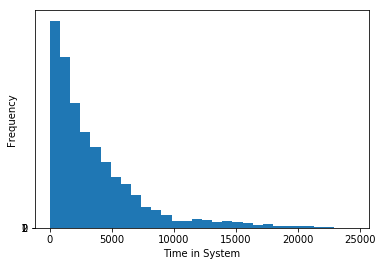

In [92]:
# Tinker with number of bins, until it looks right
plt.hist(system_time,bins=30)
# you can customize the exact tick marks on an axis
plt.yticks(range(0,3))
plt.ylabel('Frequency');
plt.xlabel('Time in System');

## The NumPy package provides lots of statistical methods, we call it with `np`

In [93]:
np.max(system_time)

24561

In [94]:
# 50th percentile, or median
np.percentile(system_time,50)

2402.0

In [95]:
np.median(system_time)

2402.0

In [96]:
np.std(system_time)

3773.579696915166

# Homework/In-class work

1. Consider the following function that will return an exponential random variable that takes one argument, the mean, 

```
def exponential(mean):
    # using math.ceil will round up all floating point numbers
    return math.ceil(np.random.exponential(mean))
```

    - So, to get an exponential random variable with mean 10, we would use: `exponential(10)`

    - Incorporate this function into the code and use it to for arrivals and service times

1. Of course, we may want to use other distributions in a simulation.  Write functions for other distributions,  `normal`, `triangular`,  and `uniform`, explore the `numpy` documentation:  https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

   - remember, make sure your functions return only positive integers for our purposes.
   - try out each of your functions in a cell to make sure they work as expected

   
